# **<font color=blue> PROYECTO FINAL**
## <font color=blue> RED NEURONAL CONVOLUCIONAL

In [25]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage.transform import resize
import shutil
from glob import glob
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

from sklearn.model_selection import train_test_split as TTS
from sklearn.neural_network import MLPClassifier as MLPC
import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

Total Casos Positivos :349
Total Casos Negativos:397


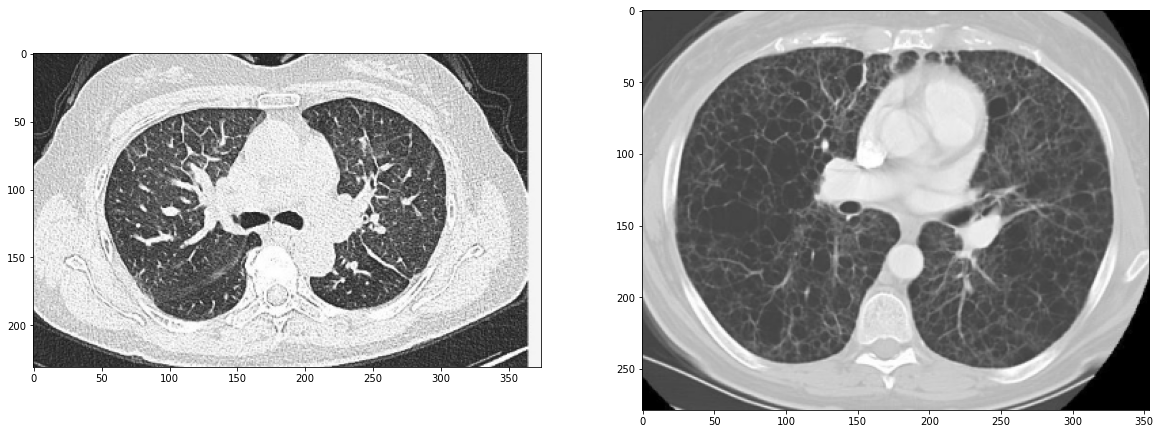

In [22]:
SM_filepath = './MLP'
Directorio = './COVID/'
ds_PulmonCovidP = os.path.join('./CT_COVID/')
ds_PulmonCovidN = os.path.join('./CT_NonCOVID/')
print('Total Casos Positivos :{}'.format(len(os.listdir(ds_PulmonCovidP))))
print('Total Casos Negativos:{}'.format(len(os.listdir(ds_PulmonCovidN))))

CovPositivo = glob(os.path.join(ds_PulmonCovidP,"*.png"))
CovNegativo = glob(os.path.join(ds_PulmonCovidN,"*.png"))
CovNegativo.extend(glob(os.path.join(ds_PulmonCovidN,"*.jpg")))
#MUESTA DE IMAGENES
IMG_P = cv2.imread(os.path.join(CovPositivo[150]))
IMG_N = cv2.imread(os.path.join(CovNegativo[150]))
f = plt.figure(figsize=(20, 20))
f.add_subplot(1, 2, 1)
plt.imshow(IMG_P)
f.add_subplot(1, 2, 2)
plt.imshow(IMG_N)

**KERAS - Test 1**

In [8]:
Epoch = 40
Batch = 64
Img_H, Img_W = 248,248
opt = tf.keras.optimizers.Adam(lr=0.001,decay=0.001/Epoch)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10, restore_best_weights=True)

In [10]:
Train_D = ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=5,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.05,zoom_range=0.05,validation_split=0.2) 
Train_G = Train_D.flow_from_directory(Directorio,target_size=(Img_H, Img_W),batch_size=Batch,class_mode='binary', color_mode="grayscale",subset='training') 
Val_G = Train_D.flow_from_directory(Directorio, target_size=(Img_H, Img_W),batch_size=Batch,class_mode='binary',color_mode="grayscale", subset='validation') 

Found 598 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [12]:
model = Sequential()
model.add(Conv2D(32, 3, padding='same', activation='relu',input_shape=(Img_H, Img_W, 1))) 
model.add(MaxPool2D()) 
model.add(Conv2D(64, 5, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy', 'Precision', 'Recall'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 248, 248, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 64)      51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               31490176  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [17]:
Model_Fit = model.fit(Train_G,steps_per_epoch = Train_G.samples // Batch,validation_data = Val_G, validation_steps = Val_G.samples // Batch, epochs = Epoch, verbose = 0, callbacks=[es])

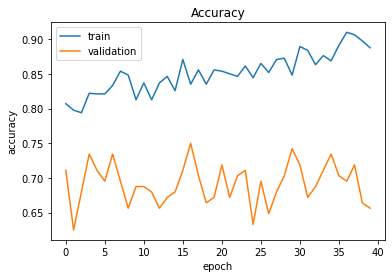

In [53]:
plt.title('Model - Accuracy')
plt.plot(Model_Fit.history['accuracy'])
plt.plot(Model_Fit.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

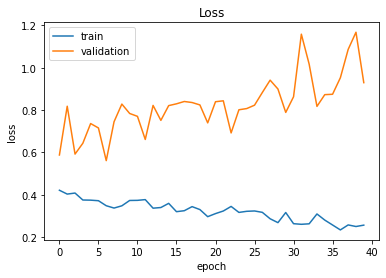

In [54]:
plt.title('Model - Loss')
plt.plot(Model_Fit.history['loss'])
plt.plot(Model_Fit.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [55]:
y_pred = (model.predict_generator(Val_G) > 0.5).astype(int)
y_true = Val_G.classes

for name, value in zip(model.metrics_names, model.evaluate_generator(Val_G)):
    print(f'{name}: {value}')
    
print(f'F1 score: {sklearn.metrics.f1_score(y_true, y_pred)}')

loss: 0.9671728610992432
accuracy: 0.662162184715271
precision: 0.6494845151901245
recall: 0.797468364238739
F1 score: 0.576271186440678


**KERAS - Test 2**

In [48]:
Epoch2 = 50
Batch2 = 70
opt2 = tf.keras.optimizers.Adam(lr=0.001,decay=0.001/Epoch2)
es2 = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10, restore_best_weights=True)

In [ ]:
Train_D = ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=5,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.05,zoom_range=0.05,validation_split=0.2) 
Train_G = Train_D.flow_from_directory(Directorio,target_size=(Img_H, Img_W),batch_size=Batch,class_mode='binary', color_mode="grayscale",subset='training') 
Val_G = Train_D.flow_from_directory(Directorio, target_size=(Img_H, Img_W),batch_size=Batch,class_mode='binary',color_mode="grayscale", subset='validation') 

In [49]:
model2 = Sequential()
model2.add(Conv2D(16, 1, padding='same', activation='relu',input_shape=(Img_H, Img_W, 1))) 
model2.add(MaxPool2D()) 
model2.add(Conv2D(32, 3, padding='same', activation='relu'))
model2.add(MaxPool2D())
model2.add(Conv2D(64, 5, padding='same', activation='relu'))
model2.add(MaxPool2D())
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

In [50]:
model2.compile(optimizer=opt2, loss=keras.losses.binary_crossentropy, metrics=['accuracy', 'Precision', 'Recall'])

In [51]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 248, 248, 16)      32        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 64)        51264     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 61504)            

In [52]:
hist2 = model2.fit(Train_G, steps_per_epoch = Train_G.samples // Batch2, validation_data = Val_G, validation_steps = Val_G.samples // Batch2,  epochs = Epoch2,  verbose = 0, callbacks=[es2])

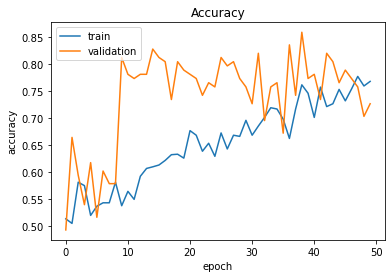

In [56]:
plt.title('Accuracy')
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

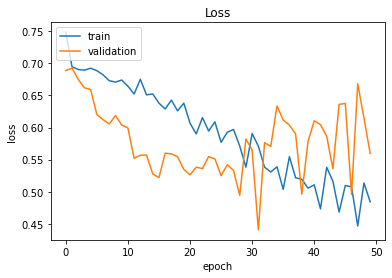

In [57]:
plt.title('Loss')
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
y_pred2 = (model2.predict_generator(Val_G) > 0.5).astype(int)
y_true2 = Val_G.classes

for name, value in zip(model2.metrics_names, model2.evaluate_generator(Val_G)):
    print(f'{name}: {value}')
    
print(f'F1 score: {sklearn.metrics.f1_score(y_true, y_pred)}')

loss: 0.6191083192825317
accuracy: 0.7432432174682617
precision: 0.7252747416496277
recall: 0.8354430198669434
F1 score: 0.576271186440678
